In [1]:
%matplotlib inline
import subprocess
import time
import cv2
import os
import matplotlib.pyplot as plt
from import_me import *

In [2]:
with open("orig_pinguim.bmp", "rb") as f:
    _ = f.read()
orig = np.frombuffer(_, dtype = np.uint8)

img_orig = orig[122:]
img_orig = np.flipud(cv2.cvtColor(img_orig.reshape((400, 600, 3)), cv2.COLOR_BGR2RGB)).ravel()

In [3]:
header = orig[:122]

In [4]:
%%time
lst_imgs = []
for x in np.arange(0, 1.5, 0.1):
    print("Simulando para Noise: ", x)
    
    
    process=subprocess.Popen(["python2", "top_block.py", "--noise", str(x)],
                         stdin=subprocess.PIPE,
                         stdout=subprocess.PIPE,
                         stderr=subprocess.PIPE)


    time.sleep(15)

    # while os.stat("output.data").st_size < os.stat("orig_pinguim.bmp").st_size * 2:
    #     pass

    inputdata= " "
    stdoutdata,stderrdata=process.communicate(input=inputdata)
    
    if os.stat("output.data").st_size != os.stat("orig_pinguim.bmp").st_size * 2:
        print("Não teve tempo suficiente para o valor: {}!!! ERRO!".format(x))
        break
        
    print("Fazendo Correlate...")
        
    img = readOutput("output.data", np.array([67, 255], dtype = np.uint8), header, (400, 600))
    lst_imgs.append(img)
    print("*--------------------------------------------------------------*")
#     print("*--------------------------------------------------------------*")

('Simulando para Noise: ', 0.0)
Fazendo Correlate...
*--------------------------------------------------------------*
('Simulando para Noise: ', 0.1)
Fazendo Correlate...
*--------------------------------------------------------------*
('Simulando para Noise: ', 0.2)
Fazendo Correlate...
*--------------------------------------------------------------*
('Simulando para Noise: ', 0.30000000000000004)
Fazendo Correlate...
*--------------------------------------------------------------*
('Simulando para Noise: ', 0.4)
Fazendo Correlate...
*--------------------------------------------------------------*
('Simulando para Noise: ', 0.5)
Fazendo Correlate...
*--------------------------------------------------------------*
('Simulando para Noise: ', 0.6000000000000001)
Fazendo Correlate...
*--------------------------------------------------------------*
('Simulando para Noise: ', 0.7000000000000001)
Fazendo Correlate...
*--------------------------------------------------------------*
('Simuland

In [5]:
# %%time

# process=subprocess.Popen(["python2", "top_block.py", "--noise", str(0.1)],
#                          stdin=subprocess.PIPE,
#                          stdout=subprocess.PIPE,
#                          stderr=subprocess.PIPE)


# time.sleep(11)

# # while os.stat("output.data").st_size < os.stat("orig_pinguim.bmp").st_size * 2:
# #     pass

# inputdata= " "
# stdoutdata,stderrdata=process.communicate(input=inputdata)

In [6]:
# stdoutdata, stderrdata

In [7]:
# os.stat("output.data").st_size == os.stat("orig_pinguim.bmp").st_size * 2

In [5]:
%%time
img = readOutput("output.data", np.array([67, 255], dtype = np.uint8), header, (400, 600))

CPU times: user 18.2 s, sys: 28 ms, total: 18.2 s
Wall time: 18.2 s


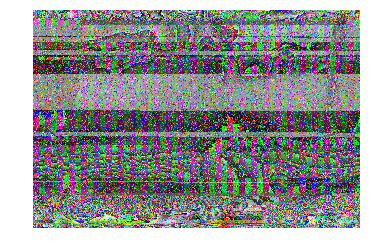

In [6]:
plt.axis("off")
plt.imshow(img)

In [20]:
def plot_lst_r(lst_r, img_orig):
    fig, axs = plt.subplots(3, 5, figsize = (16, 8))
    #fig.patch.set_facecolor("black")
    [ax.set_axis_off() for ax in axs.ravel()]

    for i in range(axs.shape[0]):
        for j in range(axs.shape[1]):
            #print(i, j)
            ind_1d = i*axs.shape[1]+j
            
            #byte error rate
            byte_error = float(len(np.nonzero(img_orig - lst_r[ind_1d].ravel())[0]))/len(img_orig)
            #bit error rate
            bit_error = float(len(np.nonzero(np.unpackbits(img_orig) - np.unpackbits(lst_r[ind_1d].ravel()))[0])) / len(np.unpackbits(img_orig))

            axs[i][j].set_title("Noise: {:.1f}\nByte Erro: {:.3f}\n Bit Error: {:.5f}".\
                                format( float(ind_1d)/10, byte_error, bit_error))
            axs[i][j].imshow(lst_r[ind_1d])
    return

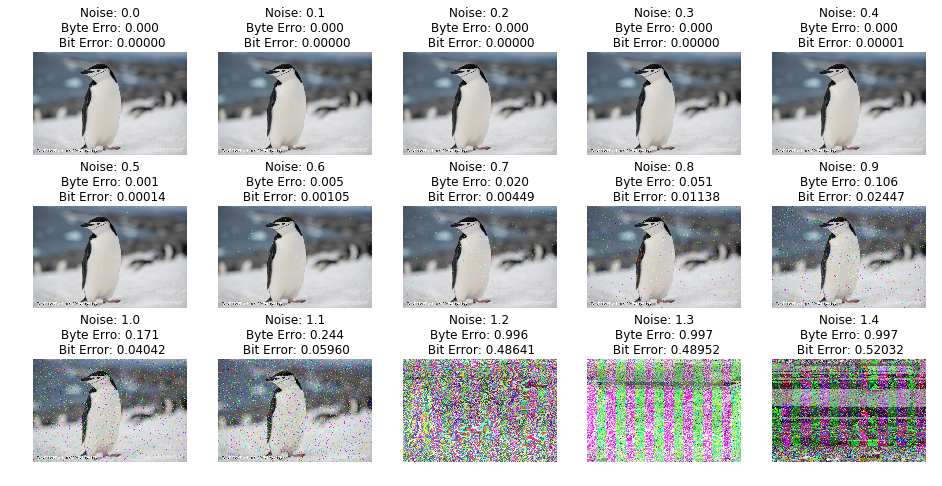

In [21]:
plot_lst_r(lst_imgs, img_orig)

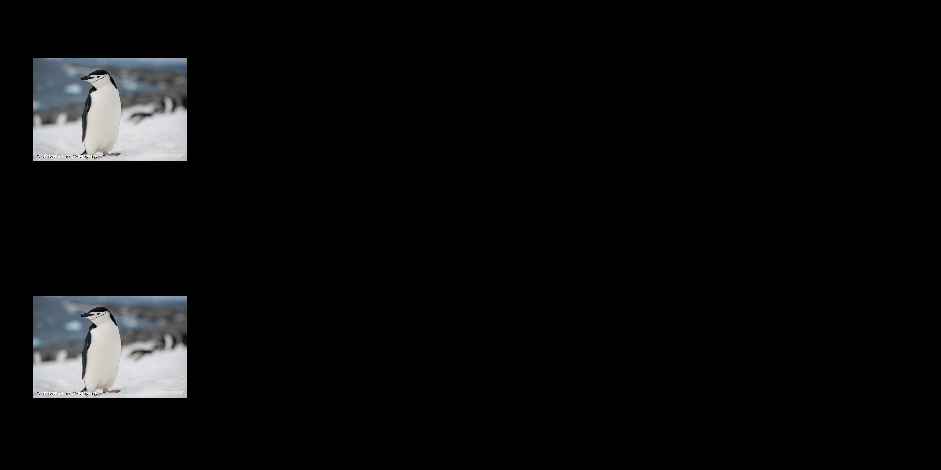

In [58]:
fig, axs = plt.subplots(2, 5, figsize = (16, 8))
fig.patch.set_facecolor("black")
[ax.set_axis_off() for ax in axs.ravel()]

axs[0, 0].imshow(lst_imgs[0])
axs[1, 0].imshow(lst_imgs[1])
axs[0, 0].imshow(img)

In [46]:
img_orig = orig[122:]
img_orig = np.flipud(cv2.cvtColor(img_orig.reshape((400, 600, 3)), cv2.COLOR_BGR2RGB)).ravel()

In [47]:
#byte error rate
float(len(np.nonzero(img_orig - img.ravel())[0]))/len(img_orig)

0.10014027777777777

In [48]:
#bit error rate
float(len(np.nonzero(np.unpackbits(img_orig) - np.unpackbits(img.ravel()))[0])) / len(np.unpackbits(img_orig))

0.022959027777777776